# Detection of Distributed Denial of Service (DDoS) Attack using Ensemble Learning and Deep Learning


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Preview of data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df.head().style

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,4000000.000000,666666.666700,3.000000,0.000000,3,3,3,3.000000,0.000000,3,3,0,0.000000,0.000000,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.000000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.000000,0.000000,0,0,0.000000,0.000000,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.000000,0.000000,6,6,6.000000,0.000000,110091.743100,18348.623850,109.000000,0.000000,109,109,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.000000,6.000000,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.000000,0.000000,0,0,0.000000,0.000000,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.000000,0.000000,6,6,6.000000,0.000000,230769.230800,38461.538460,52.000000,0.000000,52,52,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.000000,6.000000,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.000000,0.000000,0,0,0.000000,0.000000,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.000000,0.000000,6,6,6.000000,0.000000,352941.176500,58823.529410,34.000000,0.000000,34,34,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.000000,6.000000,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.000000,0.000000,0,0,0.000000,0.000000,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,4000000.000000,666666.666700,3.000000,0.000000,3,3,3,3.000000,0.000000,3,3,0,0.000000,0.000000,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.000000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.000000,0.000000,0,0,0.000000,0.000000,0,0,BENIGN


## **Shape of Data**

In [ ]:

df.shape

(225745, 79)

## **List of 78 Features**

In [ ]:
list(df.columns)

[' Destination Port',
 ' Flow Duration',
 ' Total Fwd Packets',
 ' Total Backward Packets',
 'Total Length of Fwd Packets',
 ' Total Length of Bwd Packets',
 ' Fwd Packet Length Max',
 ' Fwd Packet Length Min',
 ' Fwd Packet Length Mean',
 ' Fwd Packet Length Std',
 'Bwd Packet Length Max',
 ' Bwd Packet Length Min',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 'Flow Bytes/s',
 ' Flow Packets/s',
 ' Flow IAT Mean',
 ' Flow IAT Std',
 ' Flow IAT Max',
 ' Flow IAT Min',
 'Fwd IAT Total',
 ' Fwd IAT Mean',
 ' Fwd IAT Std',
 ' Fwd IAT Max',
 ' Fwd IAT Min',
 'Bwd IAT Total',
 ' Bwd IAT Mean',
 ' Bwd IAT Std',
 ' Bwd IAT Max',
 ' Bwd IAT Min',
 'Fwd PSH Flags',
 ' Bwd PSH Flags',
 ' Fwd URG Flags',
 ' Bwd URG Flags',
 ' Fwd Header Length',
 ' Bwd Header Length',
 'Fwd Packets/s',
 ' Bwd Packets/s',
 ' Min Packet Length',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 'FIN Flag Count',
 ' SYN Flag Count',
 ' RST Flag Count',
 ' P

# Data types

In [ ]:
df.dtypes

 Destination Port                int64
 Flow Duration                   int64
 Total Fwd Packets               int64
 Total Backward Packets          int64
Total Length of Fwd Packets      int64
                                ...   
Idle Mean                      float64
 Idle Std                      float64
 Idle Max                        int64
 Idle Min                        int64
 Label                          object
Length: 79, dtype: object

# Converting data type of each feature to np.float64

In [ ]:
new_df = df.astype(np.float64, errors='ignore')

### After converting each data type to float32

In [ ]:
new_df.dtypes

 Destination Port              float64
 Flow Duration                 float64
 Total Fwd Packets             float64
 Total Backward Packets        float64
Total Length of Fwd Packets    float64
                                ...   
Idle Mean                      float64
 Idle Std                      float64
 Idle Max                      float64
 Idle Min                      float64
 Label                          object
Length: 79, dtype: object

In [ ]:
# new_df.column.dtype
columns = new_df.head(0)
for i in columns:
  print(f"{i}\t\t\t{new_df[i].dtype}")


 Destination Port			float64
 Flow Duration			float64
 Total Fwd Packets			float64
 Total Backward Packets			float64
Total Length of Fwd Packets			float64
 Total Length of Bwd Packets			float64
 Fwd Packet Length Max			float64
 Fwd Packet Length Min			float64
 Fwd Packet Length Mean			float64
 Fwd Packet Length Std			float64
Bwd Packet Length Max			float64
 Bwd Packet Length Min			float64
 Bwd Packet Length Mean			float64
 Bwd Packet Length Std			float64
Flow Bytes/s			float64
 Flow Packets/s			float64
 Flow IAT Mean			float64
 Flow IAT Std			float64
 Flow IAT Max			float64
 Flow IAT Min			float64
Fwd IAT Total			float64
 Fwd IAT Mean			float64
 Fwd IAT Std			float64
 Fwd IAT Max			float64
 Fwd IAT Min			float64
Bwd IAT Total			float64
 Bwd IAT Mean			float64
 Bwd IAT Std			float64
 Bwd IAT Max			float64
 Bwd IAT Min			float64
Fwd PSH Flags			float64
 Bwd PSH Flags			float64
 Fwd URG Flags			float64
 Bwd URG Flags			float64
 Fwd Header Length			float64
 Bwd Header Length			float64
Fwd P

### Finding unique data labels

In [ ]:
new_df[' Label'].unique()

array(['BENIGN', 'DDoS'], dtype=object)

### Finding Infinity and NaN values in dataset

In [ ]:
prev_shape = new_df.shape
new_df = new_df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
curr_shape = new_df.shape

print(f"Before Dropping : {prev_shape}\t After Dropping : {curr_shape}")

Before Dropping : (225745, 79)	 After Dropping : (225745, 77)


### Label Encoding

In [ ]:

le = LabelEncoder()
new_df[' Label']= le.fit_transform(new_df[' Label'])
new_df.head().style

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865.000000,3.000000,2.000000,0.000000,12.000000,0.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,3.000000,3.000000,3.000000,3.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,666666.666700,0.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.000000,6.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,0.000000,0.000000,33.000000,-1.000000,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,55054.000000,109.000000,1.000000,1.000000,6.000000,6.000000,6.000000,6.000000,6.000000,0.000000,6.000000,6.000000,6.000000,0.000000,109.000000,0.000000,109.000000,109.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,20.000000,9174.311927,9174.311927,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,9.000000,6.000000,6.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,1.000000,6.000000,29.000000,256.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,55055.000000,52.000000,1.000000,1.000000,6.000000,6.000000,6.000000,6.000000,6.000000,0.000000,6.000000,6.000000,6.000000,0.000000,52.000000,0.000000,52.000000,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,20.000000,19230.769230,19230.769230,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,9.000000,6.000000,6.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,1.000000,6.000000,29.000000,256.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,46236.000000,34.000000,1.000000,1.000000,6.000000,6.000000,6.000000,6.000000,6.000000,0.000000,6.000000,6.000000,6.000000,0.000000,34.000000,0.000000,34.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,20.000000,29411.764710,29411.764710,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,9.000000,6.000000,6.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,1.000000,6

In [ ]:
new_df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,225745.00000,2.257450e+05,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,...,225745.000000,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,225745.000000
mean,8879.61946,1.624165e+07,4.874916,4.572775,939.463346,5.960477e+03,538.535693,27.882221,164.826715,214.907242,...,21.482753,1.848261e+05,1.293436e+04,2.080849e+05,1.776201e+05,1.032214e+07,3.611943e+06,1.287813e+07,7.755355e+06,0.567131
std,19754.64740,3.152437e+07,15.422874,21.755356,3249.403484,3.921834e+04,1864.128991,163.324159,504.892965,797.411073,...,4.166799,7.979250e+05,2.102737e+05,9.002350e+05,7.842602e+05,2.185303e+07,1.275689e+07,2.692126e+07,1.983109e+07,0.495474
min,0.00000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,80.00000,7.118000e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,80.00000,1.452333e+06,3.000000,4.000000,30.000000,1.640000e+02,20.000000,0.000000,8.666667,5.301991,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
75%,80.00000,8.805237e+06,5.000000,5.000000,63.000000,1.160100e+04,34.000000,6.000000,32.000000,10.263203,...,20.000000,1.878000e+03,0.000000e+00,1.878000e+03,1.862000e+03,8.239725e+06,0.000000e+00,8.253838e+06,7.422849e+06,1.000000
max,65532.00000,1.199999e+08,1932.000000,2942.000000,183012.000000,5.172346e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08,1.000000


### Train Test Split

In [ ]:
new_df = new_df.sample(frac=0.30,replace=False,axis=0,random_state=1)


In [ ]:
X = new_df.iloc[:,:-1].values
print("shape of X",X.shape)

Y = new_df.iloc[:,-1].values
print("shape of Y",Y.shape)

shape of X (67724, 76)
shape of Y (67724,)


In [ ]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

## Chi Square

In [ ]:
feature_list = new_df.columns.values
bestfeatures = SelectKBest(score_func = mutual_info_classif, k=50)
fit = bestfeatures.fit(X,Y)

dfscores = pd.DataFrame(fit.scores_)

dfcolumns = pd.DataFrame(feature_list)


featureScores = pd.concat([dfcolumns,dfscores],axis=1)


featureScores.columns = ['Selected_columns','Score_chi2']
print(featureScores.nlargest(50,'Score_chi2'))

                Selected_columns  Score_chi2
4    Total Length of Fwd Packets    0.651409
61             Subflow Fwd Bytes    0.650636
50           Average Packet Size    0.563860
12        Bwd Packet Length Mean    0.543000
5    Total Length of Bwd Packets    0.542989
63             Subflow Bwd Bytes    0.541899
52          Avg Bwd Segment Size    0.541669
53           Fwd Header Length.1    0.538506
32             Fwd Header Length    0.537402
0               Destination Port    0.535125
10         Bwd Packet Length Max    0.524945
64        Init_Win_bytes_forward    0.491388
8         Fwd Packet Length Mean    0.489345
51          Avg Fwd Segment Size    0.489239
6          Fwd Packet Length Max    0.487570
33             Bwd Header Length    0.471243
21                   Fwd IAT Max    0.447332
18                 Fwd IAT Total    0.444790
19                  Fwd IAT Mean    0.435053
60           Subflow Fwd Packets    0.406392
2              Total Fwd Packets    0.404333
20        

In [ ]:
# print(featureScores.nlargest(50,'Score_chi2').Selected_columns.values)
featureScore_after_filter = featureScores.nlargest(50,'Score_chi2')
print(featureScore_after_filter)
count = 0
ind = []
for i in featureScore_after_filter.Score_chi2:
    if i < 0.2:
        ind.append(featureScore_after_filter.index[count])
    count = count + 1
featureScore_after_filter = featureScore_after_filter.drop(ind,axis = 0)  # contains all the filtered features
X = pd.DataFrame(X)
X = X.loc[:,featureScore_after_filter.index] # contains data after filter from feature selection
print(len(X.columns))


                Selected_columns  Score_chi2
4    Total Length of Fwd Packets    0.651409
61             Subflow Fwd Bytes    0.650636
50           Average Packet Size    0.563860
12        Bwd Packet Length Mean    0.543000
5    Total Length of Bwd Packets    0.542989
63             Subflow Bwd Bytes    0.541899
52          Avg Bwd Segment Size    0.541669
53           Fwd Header Length.1    0.538506
32             Fwd Header Length    0.537402
0               Destination Port    0.535125
10         Bwd Packet Length Max    0.524945
64        Init_Win_bytes_forward    0.491388
8         Fwd Packet Length Mean    0.489345
51          Avg Fwd Segment Size    0.489239
6          Fwd Packet Length Max    0.487570
33             Bwd Header Length    0.471243
21                   Fwd IAT Max    0.447332
18                 Fwd IAT Total    0.444790
19                  Fwd IAT Mean    0.435053
60           Subflow Fwd Packets    0.406392
2              Total Fwd Packets    0.404333
20        

In [ ]:
print(len(X.columns))

43


In [ ]:
from sklearn.model_selection import train_test_split

# new_df = new_df.reset_index()

# X_train_full, X_test, y_train_full, y_test = train_test_split(X, Y, test_size=1, random_state=42,shuffle = True)


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42,shuffle =True)

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.33, random_state=1, shuffle = True)



print(f"X_train : {X_train.shape}\nX_test : {X_test.shape}\nY_train : {y_train.shape}\nY_test : {y_test.shape}")

X_train : (45375, 43)
X_test : (22349, 43)
Y_train : (45375,)
Y_test : (22349,)


## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss_50=StandardScaler()
X_train_std = ss_50.fit_transform(X_train)
X_test_std = ss_50.fit_transform(X_test)
X_val_std = ss_50.fit_transform(X_val)
print(X_train_std.shape)
print(X_test_std.shape)
print(X_val_std.shape)

(45375, 43)
(22349, 43)
(22349, 43)


## Machine Learning Algorithms

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:
target_names = ['BENIGN','DDoS']

### Naive Bayes Algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

gnb = GaussianNB()
gnb.fit(X_train, y_train)
Y_predict = gnb.predict(X_test)
print(f"Accuracy => {metrics.accuracy_score(y_test, Y_predict)*100}%")


Accuracy => 80.88952525840082%


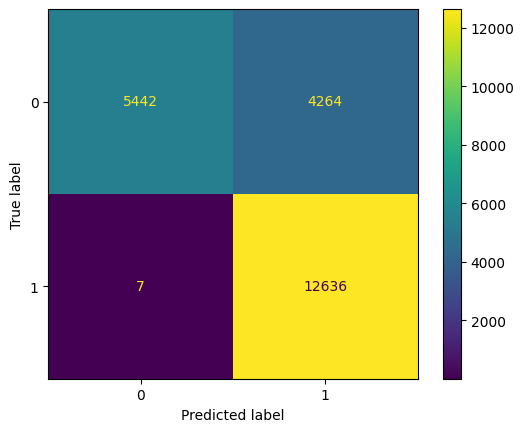

In [ ]:
metrics_gnb = metrics.accuracy_score(y_test, Y_predict)

cm = confusion_matrix(y_test, Y_predict, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gnb.classes_)
disp.plot()
plt.show()

In [ ]:
print("F1 Score = ",f1_score(y_test, Y_predict, average='macro'))
print("Recall =", metrics.recall_score(y_test, Y_predict, labels=None,
                                             pos_label=1, average='weighted',
                                             sample_weight=None))
print('Accuracy = ', metrics.accuracy_score(y_test, Y_predict)*100)
print("rep ",metrics.precision_score(y_test, Y_predict, average='macro'))
print("Confusion Matrix =\n", metrics.confusion_matrix(y_test, Y_predict, labels=None,
                                              sample_weight=None))

F1 Score =  0.7868049427262878
Recall = 0.8088952525840082
Accuracy =  80.88952525840082
rep  0.8732038341544672
Confusion Matrix =
 [[ 5442  4264]
 [    7 12636]]


### Random Forest Algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier (max_depth=3,random_state=42)
rfc.fit(X_train_std, y_train)
y_pred_rfc = rfc.predict(X_test_std)

print(f"Accuracy => {metrics.accuracy_score(y_test, y_pred_rfc)*100}%")

Accuracy => 99.84786791355317%


In [ ]:
metrics_rfc = metrics.accuracy_score(y_test, y_pred_rfc)
print(metrics_rfc)

0.9984786791355318


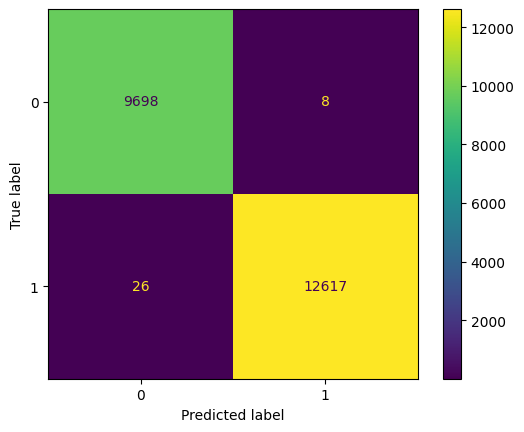

In [ ]:


cm = confusion_matrix(y_test, y_pred_rfc, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rfc.classes_)
disp.plot()
plt.show()

In [ ]:
print("F1 Score = ",f1_score(y_test, y_pred_rfc, average='macro'))
print("Recall =", metrics.recall_score(y_test, y_pred_rfc, labels=None,
                                             pos_label=1, average='weighted',
                                             sample_weight=None))
print('Accuracy = ', metrics.accuracy_score(y_test, y_pred_rfc)*100)
print("rep ",metrics.precision_score(y_test, y_pred_rfc, average='macro'))
print("Confusion Matrix =\n", metrics.confusion_matrix(y_test, y_pred_rfc, labels=None,
                                              sample_weight=None))

F1 Score =  0.9984522766178171
Recall = 0.9984786791355318
Accuracy =  99.84786791355317
rep  0.9983462699211098
Confusion Matrix =
 [[ 9698     8]
 [   26 12617]]


### K Nearest Neighbours


In [ ]:
import math
from sklearn.neighbors import KNeighborsClassifier

k = round(math.sqrt(X_train.shape[0]))

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)



In [ ]:
metrics_knn = metrics.accuracy_score(y_test, y_pred_knn)
print(metrics_knn)

0.9950780795561323


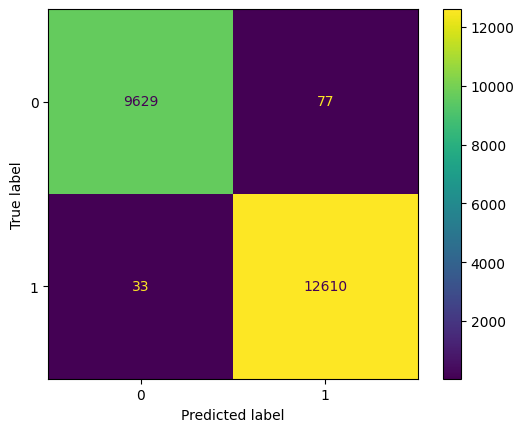

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=knn.classes_)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn,
                              display_labels=knn.classes_)
disp_knn.plot()
plt.show()

In [ ]:
print("F1 Score = ",f1_score(y_test, y_pred_knn, average='macro'))
print("Recall =", metrics.recall_score(y_test, y_pred_knn, labels=None,
                                             pos_label=1, average='weighted',
                                             sample_weight=None))
print('Accuracy = ', metrics.accuracy_score(y_test, y_pred_knn)*100)
print("rep ",metrics.precision_score(y_test, y_pred_knn, average='macro'))
print("Confusion Matrix =\n", metrics.confusion_matrix(y_test, y_pred_knn, labels=None,
                                              sample_weight=None))

F1 Score =  0.9949889260195814
Recall = 0.9950780795561323
Accuracy =  99.50780795561323
rep  0.9952576766823954
Confusion Matrix =
 [[ 9629    77]
 [   33 12610]]


## **XGBoost**

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train_std, y_train)

y_pred_xgb = xgb_model.predict(X_test_std)

In [ ]:
score_xg = metrics.accuracy_score(y_test,y_pred_xgb)
print(score_xg*100)

In [ ]:
print("F1 Score = ",f1_score(y_test,y_pred_xgb, average='macro'))
print("Recall =", metrics.recall_score(y_test,y_pred_xgb, labels=None,
                                             pos_label=1, average='weighted',
                                             sample_weight=None))
print('Accuracy = ', metrics.accuracy_score(y_test,y_pred_xgb)*100)
print("rep ",metrics.precision_score(y_test,y_pred_xgb, average='macro'))
print("Confusion Matrix =\n", metrics.confusion_matrix(y_test,y_pred_xgb, labels=None,
                                              sample_weight=None))

In [ ]:
print("Classification Report =\n", metrics.classification_report(y_test, y_pred_xgb, target_names = target_names))

In [ ]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb, labels=xgb_model.classes_)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb,
                              display_labels=xgb_model.classes_)
disp_xgb.plot()
plt.show()

# BLENDING

In [ ]:
from sklearn.linear_model import LogisticRegression

def get_models():
 models = list()
 models.append(knn)
 models.append(gnb)
 models.append(rfc)

 return models

In [ ]:
# fit the blending ensemble
def fit_ensemble(models, X_train, X_val, y_train, y_val):
	meta_X = list()
	for model in models:
		model.fit(X_train_std, y_train)
		yhat = model.predict(X_val_std)
		yhat = yhat.reshape(len(yhat), 1)
		meta_X.append(yhat)
	meta_X = np.hstack(meta_X)

	# define blending model
	blender = LogisticRegression()
	blender.fit(meta_X, y_val)
	return blender

In [ ]:
# make a prediction with the blending ensemble
def predict_ensemble(models, blender, X_test):
	meta_X = list()
	for model in models:
		yhat = model.predict(X_test_std)
		yhat = yhat.reshape(len(yhat), 1)
		meta_X.append(yhat)

	meta_X = np.hstack(meta_X)
	return blender.predict(meta_X)

In [ ]:
from sklearn.metrics import accuracy_score


models = get_models()
print(models)

blender = fit_ensemble(models, X_train_std, X_val_std, y_train, y_val)

yhat = predict_ensemble(models, blender, X_test_std)
score = accuracy_score(y_test, yhat)

print('Blending Accuracy: %.3f' % (score*100))

In [ ]:
score_en = metrics.accuracy_score(y_test, yhat)

cm_blend = confusion_matrix(y_test, yhat, labels=blender.classes_)
print(cm_blend)
disp_blend = ConfusionMatrixDisplay(confusion_matrix=cm_blend,
                              display_labels=blender.classes_)
disp_blend.plot()
plt.show()

In [ ]:
# print("Classification Report =\n", metrics.classification_report(y_test, yhat, target_names = target_names))
print('LSTm')



print("Classification Report =\n", metrics.classification_report(y_test, yhat,
                                                                 labels=None,
                                                                 target_names=None,
                                                                 sample_weight=None,
                                                                  digits=2,
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_test, yhat, average='macro'))
print("Recall =", metrics.recall_score(y_test, yhat, labels=None,
                                             pos_label=1, average='weighted',
                                             sample_weight=None))
print("Recall =", metrics.recall_score(y_test, yhat, labels=None,
                                             pos_label=1, average='weighted',
                                             sample_weight=None))
print("precision = ",metrics.precision_score(y_test, yhat, average='macro'))
print('Accuracy = ', metrics.accuracy_score(y_test, yhat)*100)
print("Confusion Matrix =\n", metrics.confusion_matrix(y_test,  yhat, labels=None,
                                              sample_weight=None))


## MLP

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Embedding
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import Normalizer
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger


In [ ]:
y_train_MLP = np.array(y_train)
y_test_MLP = np.array(y_test)

y_train_MLP_onehot = to_categorical(y_train_MLP)
y_test_MLP_onehot = to_categorical(y_test_MLP)

X_train_MLP = np.array(X_train_std)
X_test_MLP = np.array(X_test_std)


In [ ]:
print(y_train_MLP.shape,
X_train_MLP.shape,
y_train_MLP_onehot.shape)
print(y_train_MLP_onehot)

In [ ]:
model = Sequential()
model.add(Dense(8,input_dim=43,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(2))
model.add(Activation('softmax'))
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',
      restore_best_weights=True)

In [ ]:
def reinitialize(model):
    for l in model.layers:
        if hasattr(l,"kernel_initializer"):
            l.kernel.assign(l.kernel_initializer(tf.shape(l.kernel)))
        if hasattr(l,"bias_initializer"):
            l.bias.assign(l.bias_initializer(tf.shape(l.bias)))
        if hasattr(l,"recurrent_initializer"):
            l.recurrent_kernel.assign(l.recurrent_initializer(tf.shape(l.recurrent_kernel)))

In [ ]:
reinitialize(model)

In [ ]:
batch_size = 1000
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train_MLP, y_train_MLP_onehot, validation_data=(X_test_MLP, y_test_MLP_onehot),batch_size=batch_size, epochs=40,callbacks=[monitor])

Epoch 1/40
46/46 [==============================] - 6s 9ms/step - loss: 0.5276 - accuracy: 0.7793 - val_loss: 0.4017 - val_accuracy: 0.9768
Epoch 2/40
46/46 [==============================] - 0s 5ms/step - loss: 0.3206 - accuracy: 0.9500 - val_loss: 0.2399 - val_accuracy: 0.9619
Epoch 3/40
46/46 [==============================] - 0s 5ms/step - loss: 0.2050 - accuracy: 0.9727 - val_loss: 0.1639 - val_accuracy: 0.9871
Epoch 4/40
46/46 [==============================] - 0s 5ms/step - loss: 0.1449 - accuracy: 0.9856 - val_loss: 0.1165 - val_accuracy: 0.9906
Epoch 5/40
46/46 [==============================] - 0s 5ms/step - loss: 0.1034 - accuracy: 0.9880 - val_loss: 0.0830 - val_accuracy: 0.9896
Epoch 6/40
46/46 [==============================] - 0s 5ms/step - loss: 0.0773 - accuracy: 0.9882 - val_loss: 0.0635 - val_accuracy: 0.9905
Epoch 7/40
46/46 [==============================] - 0s 5ms/step - loss: 0.0635 - accuracy: 0.9883 - val_loss: 0.0526 - val_accuracy: 0.9911
Epoch 8/40
46/46 [==

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 352       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
 activation (Activation)     (None, 2)                 0         
                                                                 
Total params: 442
Trainable params: 442
Non-trainable pa

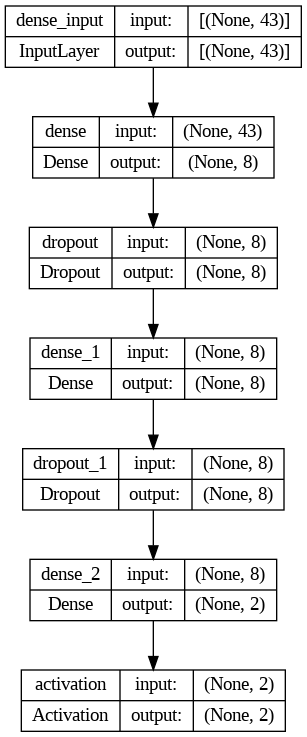

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
import matplotlib
from matplotlib import pyplot

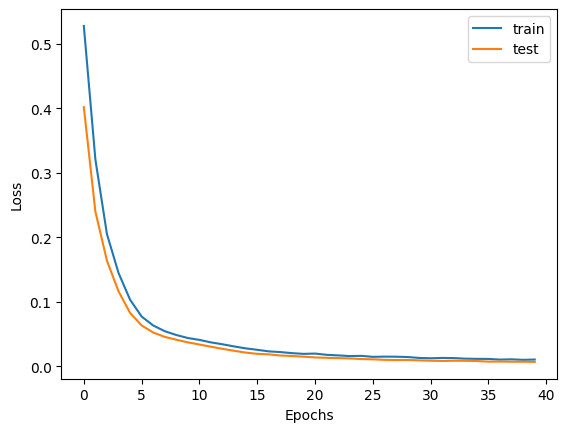

In [ ]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()

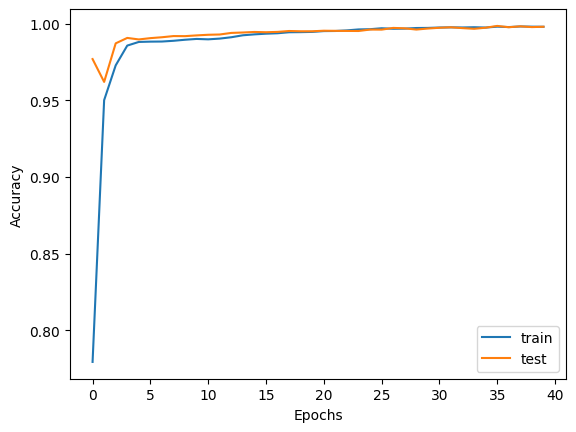

In [ ]:

pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.xlabel('Epochs')
pyplot.ylabel('Accuracy')
pyplot.legend()
pyplot.show()

In [ ]:
y_pred_MLP = np.argmax(model(X_test_MLP),axis =-1)

In [ ]:
acc_score_MLP =metrics.accuracy_score(y_test_MLP,y_pred_MLP)
print(acc_score_MLP*100)

99.78969976285292


model.fit(X_train_MLP, y_train_MLP, epochs=10, batch_size = 5000,
          validation_split=0.2)

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score,confusion_matrix

print('MLP')



print("Classification Report =\n", metrics.classification_report(y_test, y_pred_MLP,
                                                                 labels=None,
                                                                 target_names=None,
                                                                 sample_weight=None,
                                                                  digits=2,
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_test, y_pred_MLP, average='macro'))
print("Recall =", metrics.recall_score(y_test, y_pred_MLP, labels=None,
                                             pos_label=1, average='weighted',
                                             sample_weight=None))
print('Accuracy = ', metrics.accuracy_score(y_test, y_pred_MLP)*100)
print("Confusion Matrix =\n", metrics.confusion_matrix(y_test,  y_pred_MLP, labels=None,
                                              sample_weight=None))
print("Precision ",metrics.precision_score(y_test, y_pred_MLP, average='macro'))

# cm_MLP = confusion_matrix(y_test, y_pred_MLP, labels=k.classes_)
# disp_MLP = ConfusionMatrixDisplay(confusion_matrix=cm_MLP,
#                               display_labels=knn.classes_)
# disp_MLP.plot()
# plt.show()



MLP
Classification Report =
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9706
           1       1.00      1.00      1.00     12643

    accuracy                           1.00     22349
   macro avg       1.00      1.00      1.00     22349
weighted avg       1.00      1.00      1.00     22349

F1 Score =  0.9978594491116057
Recall = 0.9978969976285292
Accuracy =  99.78969976285292
Confusion Matrix =
 [[ 9671    35]
 [   12 12631]]
Precision  0.9979987056613975


#DEEP LEARNING

# LSTM

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM

In [ ]:
X_train_lstm = np.array(X_train_std)
X_test_lstm=np.array(X_test_std)

y_train_lstm = np.array(y_train)
y_test_lstm = np.array(y_test)

y_train_onehot_lstm = to_categorical(y_train_lstm)
y_test_onehot_lstm= to_categorical(y_test_lstm)

X_train_lstm_reshape = np.reshape(X_train_std,(X_train_lstm.shape[0],1,X_train_lstm.shape[1]))
X_test_lstm_reshape = np.reshape(X_test_std,(X_test_lstm.shape[0],1,X_test_lstm.shape[1]))




In [ ]:
model_lstm = Sequential()
model_lstm.add(LSTM(64,input_dim=43,return_sequences=True))
model_lstm.add(Dropout(0.1))
model_lstm.add(LSTM(32,return_sequences=False))
model_lstm.add(Dropout(0.1))

model_lstm.add(Dense(2))
model_lstm.add(Activation('softmax'))

monitor = EarlyStopping(monitor ="val_loss",min_delta =1e-3,patience=5,verbose=1,mode="auto",restore_best_weights=True)

In [ ]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 64)          27648     
                                                                 
 dropout_2 (Dropout)         (None, None, 64)          0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
 activation_1 (Activation)   (None, 2)                 0         
                                                                 
Total params: 40,130
Trainable params: 40,130
Non-trai

In [ ]:
model_lstm.reset_states()

In [ ]:
model_lstm.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history1 = model_lstm.fit(X_train_lstm_reshape,y_train_onehot_lstm, validation_data=(X_test_lstm_reshape,y_test_onehot_lstm),batch_size=1000 ,epochs=30,callbacks=[monitor])

Epoch 1/30
46/46 [==============================] - 6s 24ms/step - loss: 0.5308 - accuracy: 0.8072 - val_loss: 0.3498 - val_accuracy: 0.8623
Epoch 2/30
46/46 [==============================] - 0s 10ms/step - loss: 0.2215 - accuracy: 0.9495 - val_loss: 0.1019 - val_accuracy: 0.9860
Epoch 3/30
46/46 [==============================] - 0s 8ms/step - loss: 0.0647 - accuracy: 0.9878 - val_loss: 0.0421 - val_accuracy: 0.9870
Epoch 4/30
46/46 [==============================] - 0s 8ms/step - loss: 0.0336 - accuracy: 0.9919 - val_loss: 0.0247 - val_accuracy: 0.9927
Epoch 5/30
46/46 [==============================] - 0s 9ms/step - loss: 0.0214 - accuracy: 0.9954 - val_loss: 0.0167 - val_accuracy: 0.9953
Epoch 6/30
46/46 [==============================] - 0s 8ms/step - loss: 0.0159 - accuracy: 0.9970 - val_loss: 0.0121 - val_accuracy: 0.9971
Epoch 7/30
46/46 [==============================] - 0s 8ms/step - loss: 0.0130 - accuracy: 0.9976 - val_loss: 0.0099 - val_accuracy: 0.9979
Epoch 8/30
46/46 [

In [ ]:
#  history = model_lstm.fit(X_train_lstm_reshape,y_train_lstm, validation_data=(X_test_lstm_reshape,y_test_lstm),batch_size=5000 ,epochs=25)

In [ ]:
# history = model_lstm.fit(X_train_lstm_reshape,y_train_lstm, validation_data=(X_test_lstm_reshape,y_test_lstm),batch_size=5000 ,epochs=20)

In [ ]:

y_pred_lstm = np.argmax(model_lstm(X_test_lstm_reshape),axis =-1)

In [ ]:
lstm_acc =accuracy_score(y_test_lstm,y_pred_lstm)
print(lstm_acc*100)

99.84339344042239


In [ ]:
print('LSTm')



print("Classification Report =\n", metrics.classification_report(y_test_lstm, y_pred_lstm,
                                                                 labels=None,
                                                                 target_names=None,
                                                                 sample_weight=None,
                                                                  digits=2,
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_test_lstm, y_pred_lstm, average='macro'))
print("Recall =", metrics.recall_score(y_test_lstm, y_pred_lstm, labels=None,
                                             pos_label=1, average='weighted',
                                             sample_weight=None))
print('Accuracy = ', metrics.accuracy_score(y_test_lstm, y_pred_lstm)*100)
print("precision ",metrics.precision_score(y_test_lstm, y_pred_lstm, average='macro'))
print("Confusion Matrix =\n", metrics.confusion_matrix(y_test_lstm,  y_pred_lstm, labels=None,
                                              sample_weight=None))

LSTm
Classification Report =
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9706
           1       1.00      1.00      1.00     12643

    accuracy                           1.00     22349
   macro avg       1.00      1.00      1.00     22349
weighted avg       1.00      1.00      1.00     22349

F1 Score =  0.9984066225542612
Recall = 0.9984339344042239
Accuracy =  99.84339344042239
precision  0.9983415229852188
Confusion Matrix =
 [[ 9694    12]
 [   23 12620]]


In [ ]:

history_lstm = history.history.keys()
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:

# lstm_acc = metrics.accuracy_score(y_test, Y_predict)

In [ ]:
# plt.plot(history.history['accuracy'])
# # plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

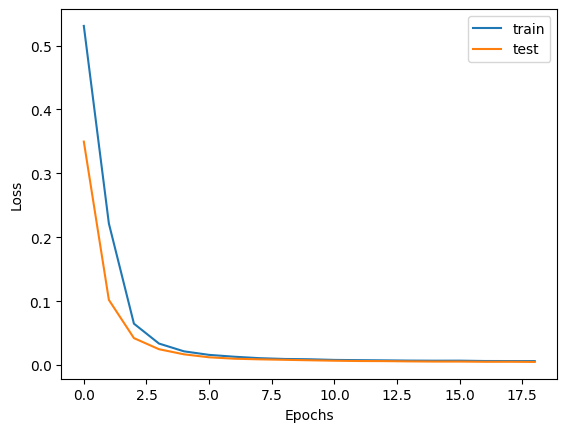

In [ ]:
pyplot.plot(history1.history['loss'], label='train')
pyplot.plot(history1.history['val_loss'], label='test')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()

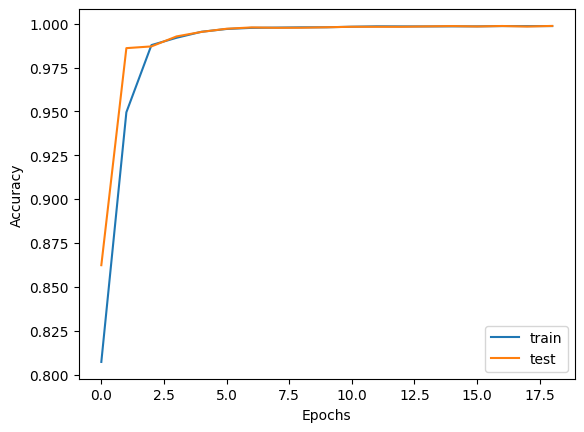

In [ ]:

pyplot.plot(history1.history['accuracy'], label='train')
pyplot.plot(history1.history['val_accuracy'], label='test')
pyplot.xlabel('Epochs')
pyplot.ylabel('Accuracy')
pyplot.legend()
pyplot.show()

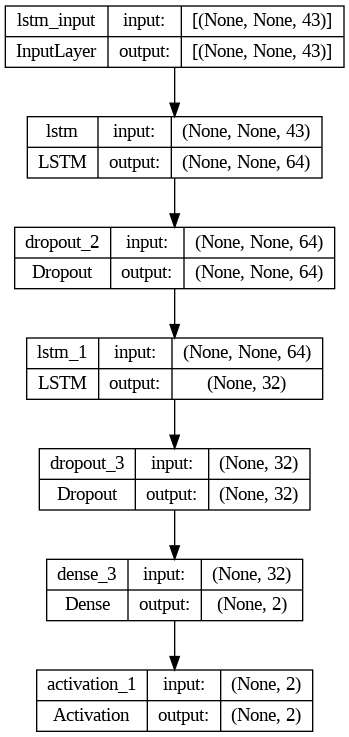

In [ ]:
plot_model(model_lstm, to_file='modellstm_plot.png', show_shapes=True, show_layer_names=True)

# Results

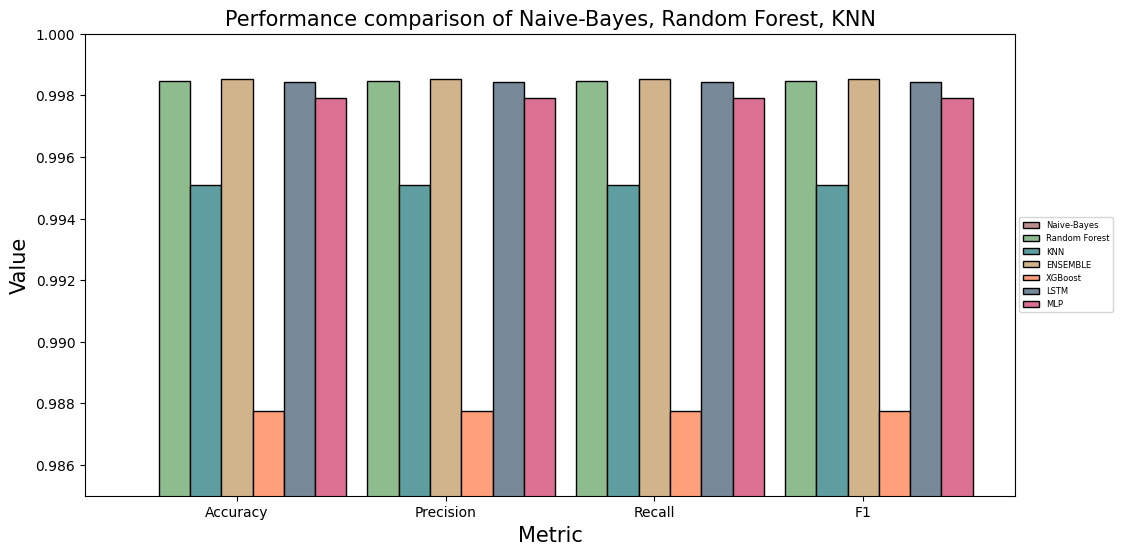

In [ ]:
plt.figure(figsize=[12, 6])
plt.gca().set_ylim(0.985, 1)

# Get the data for the plot.
comparison_frame = pd.DataFrame(
    {'Naive-Bayes': metrics_gnb, 'Random Forest': metrics_rfc, 'KNN':metrics_knn, 'ENSEMBLE':score_en, 'LSTM':lstm_acc ,'MLP':acc_score_MLP,'XGBoost':score_xg},
    index=['Accuracy', 'Precision', 'Recall', 'F1'])

# Set the width of the bars.
wd = 0.3
x_pos = np.arange(1, 2*len(comparison_frame), 2)

# Plotting the multiple bar graphs on the same figure.
plt.bar(x_pos+wd, comparison_frame['Naive-Bayes'], color='rosybrown', width=wd, edgecolor='k',
        label='Naive-Bayes')
plt.bar(x_pos+wd+wd, comparison_frame['Random Forest'], color='darkseagreen', width=wd, edgecolor='k',
        label='Random Forest')
plt.bar(x_pos+wd+wd+wd, comparison_frame['KNN'], color='cadetblue', width=wd, edgecolor='k',
        label='KNN')
plt.bar(x_pos+wd+wd+wd+wd, comparison_frame['ENSEMBLE'], color='tan', width=wd, edgecolor='k',
        label='ENSEMBLE')
plt.bar(x_pos+wd+wd+wd+wd+wd, comparison_frame['XGBoost'], color='lightsalmon', width=wd, edgecolor='k',
        label='XGBoost')
plt.bar(x_pos+wd+wd+wd+wd+wd+wd, comparison_frame['LSTM'], color='lightslategrey', width=wd, edgecolor='k',
        label='LSTM')
plt.bar(x_pos+wd+wd+wd+wd+wd+wd+wd, comparison_frame['MLP'], color='palevioletred', width=wd, edgecolor='k',
        label='MLP')




# Add ticks, a title, and a legend.
plt.xticks(x_pos+wd+wd+wd+wd, comparison_frame.index.values, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Metric', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.title(
    "Performance comparison of Naive-Bayes, Random Forest, KNN", fontsize=15)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='center left', fontsize=6,bbox_to_anchor=(1, 0.5))

plt.show()